In [1]:
import numpy as np
import numpy
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/content/NSE-TATAGLOBAL.csv')

In [3]:
data.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [17]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [18]:
data['Date']=pd.to_datetime(data['Date']) 
print(type(data.Date[0])) 

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [19]:
df=data.sort_values(by = 'Date')

In [20]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [21]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 127.3 KB


In [24]:
data.describe()


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


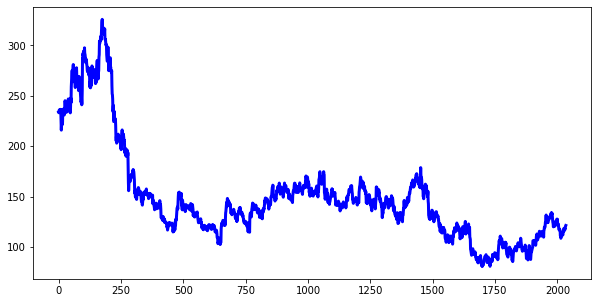

In [30]:
plt.figure(figsize = (10,5))
plt.plot(new_data['Close'],color='blue',linewidth=3.0)

In [33]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(new_data).reshape(-1,1))
scaled_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [9]:
set_size = int(len(data)*0.5)
train = scaled_data[0:set_size,:]
test = scaled_data[set_size:,:]

In [36]:
def create_dataset(dataset, time_step):
    x, y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        x.append(a)
        y.append(dataset[i + time_step, 0])
    return np.array(x), np.array(y)

In [37]:
time_step = 100
X_train, Y_train = create_dataset(train, time_step)
X_test, Y_test = create_dataset(test, time_step)

In [38]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
X_train=np.asarray(X_train).astype(np.float)
Y_train=np.asarray(Y_train).astype(np.float)

LSTM 

In [40]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train, Y_train, epochs=1, batch_size=1, verbose=2)
model.summary()

916/916 - 61s - loss: 0.0034 - 61s/epoch - 67ms/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.fit(X_train,Y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
13/13 [==============================] - 7s 308ms/step - loss: 8.8452e-04 - val_loss: 3.4737e-04
Epoch 2/60
13/13 [==============================] - 3s 194ms/step - loss: 7.9878e-04 - val_loss: 4.3056e-04
Epoch 3/60
13/13 [==============================] - 3s 195ms/step - loss: 7.5599e-04 - val_loss: 3.7657e-04
Epoch 4/60
13/13 [==============================] - 3s 194ms/step - loss: 7.1684e-04 - val_loss: 3.7664e-04
Epoch 5/60
13/13 [==============================] - 2s 191ms/step - loss: 7.1538e-04 - val_loss: 3.5762e-04
Epoch 6/60
13/13 [==============================] - 3s 194ms/step - loss: 6.9936e-04 - val_loss: 3.7461e-04
Epoch 7/60
13/13 [==============================] - 3s 193ms/step - loss: 7.0613e-04 - val_loss: 3.5150e-04
Epoch 8/60
13/13 [==============================] - 3s 195ms/step - loss: 6.9147e-04 - val_loss: 4.0758e-04
Epoch 9/60
13/13 [==============================] - 3s 199ms/step - loss: 6.8421e-04 - val_loss: 3.4840e-04
Epoch 10/60
13/13 [=========

Prediction

In [42]:
X_test=np.asarray(X_test).astype(np.float)
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

Evaluation

In [43]:
import math
from sklearn.metrics import mean_squared_error
print("MSE for Training Data",math.sqrt(mean_squared_error(Y_train,train_predict)))
print("MSE for Testing Data",math.sqrt(mean_squared_error(Y_test,test_predict)))

MSE for Training Data 170.72156180286726
MSE for Testing Data 126.91847420175024


Text(0, 0.5, 'Closing price')

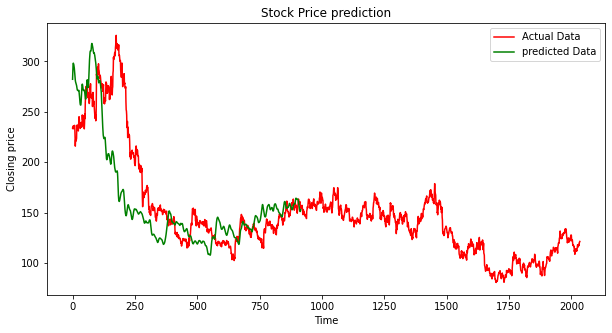

In [44]:
plt.figure(figsize=(10,5))
plt.plot(new_data['Close'],color='red',label='Actual Data')
plt.plot(train_predict,color='Green',label = 'predicted Data')
plt.legend()
plt.title("Stock Price prediction")
plt.xlabel('Time')
plt.ylabel('Closing price')